In [1]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 13.1 Weekly, daily and sub-daily data


# Weekly data
- Weekly data is difficult to work with because the seasonal period (the number of weeks in a year) is both large and non-integer.
-  The average number of weeks in a year is 52.18. Most of the methods we have considered require the seasonal period to be an integer. 
- Even if we approximate it by 52, most of the methods will not handle such a large seasonal period efficiently.
- The simplest approach is to use an STL decomposition along with a non-seasonal method applied to the seasonally adjusted data.

Example: weekly data on US finished motor gasoline products supplied (in millions of barrels per day) from February 1991 to May 2005.

In [6]:
us_gasoline

Week,Barrels
<week>,<dbl>
1991 W06,6.621
1991 W07,6.433
1991 W08,6.582
1991 W09,7.224
1991 W10,6.875
1991 W11,6.947
1991 W12,7.328
1991 W13,6.777
1991 W14,7.503


In [7]:
my_dcmp_spec <- decomposition_model(
             STL(Barrel),
             ETS(season_adjust~ season("N"))
                  )

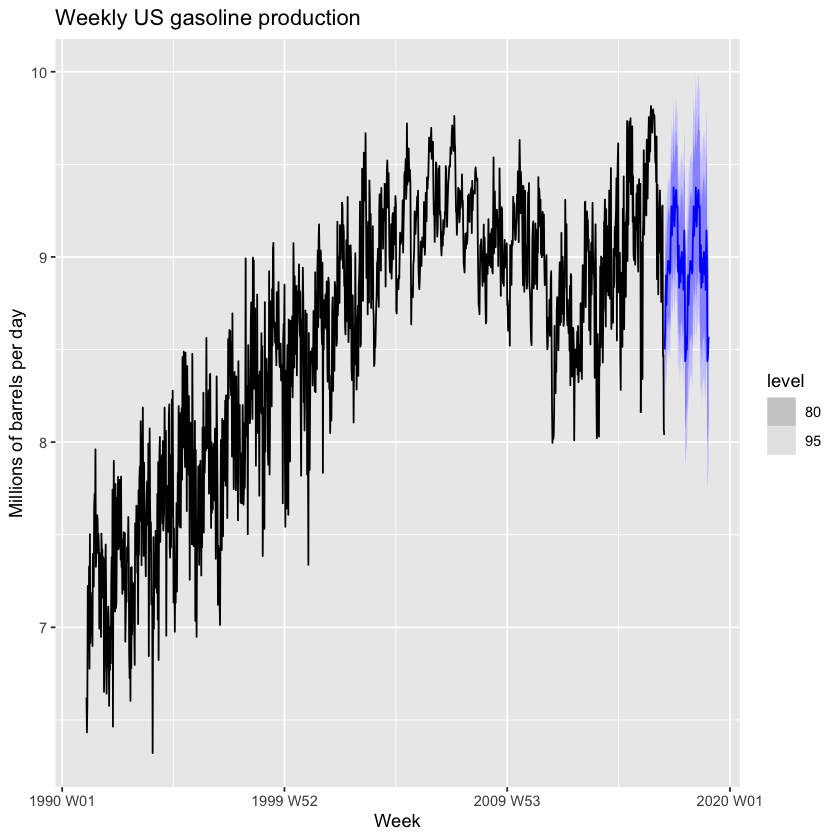

In [15]:
my_dcmp_spec <- decomposition_model(
             STL(Barrels),
             ETS(season_adjust~ season("N"))
)                
us_gasoline %>%
 model(stl_ets=my_dcmp_spec ) %>%
 forecast(h="2 years") %>%
 autoplot(us_gasoline)+
   labs(y = "Millions of barrels per day",
       title = "Weekly US gasoline production")

- Forecasts for weekly US gasoline production using an STL decomposition with an ETS model for the seasonally adjusted data.

- An alternative approach is to use a dynamic harmonic regression model:
 - the number of Fourier terms was selected by minimising the AICc. 
 - The order of the ARIMA model is also selected by minimising the AICc,    although that is done within the ARIMA() function. 
 - We use PDQ(0,0,0) to prevent ARIMA() trying to handle the seasonality using seasonal ARIMA components.

In [18]:
gas_dhr <-us_gasoline %>%
 model(dhr=ARIMA(Barrels~ PDQ(0,0,0) +fourier(K=6) ))

gas_dhr

dhr
<model>
"<LM w/ ARIMA(0,1,1) errors>"


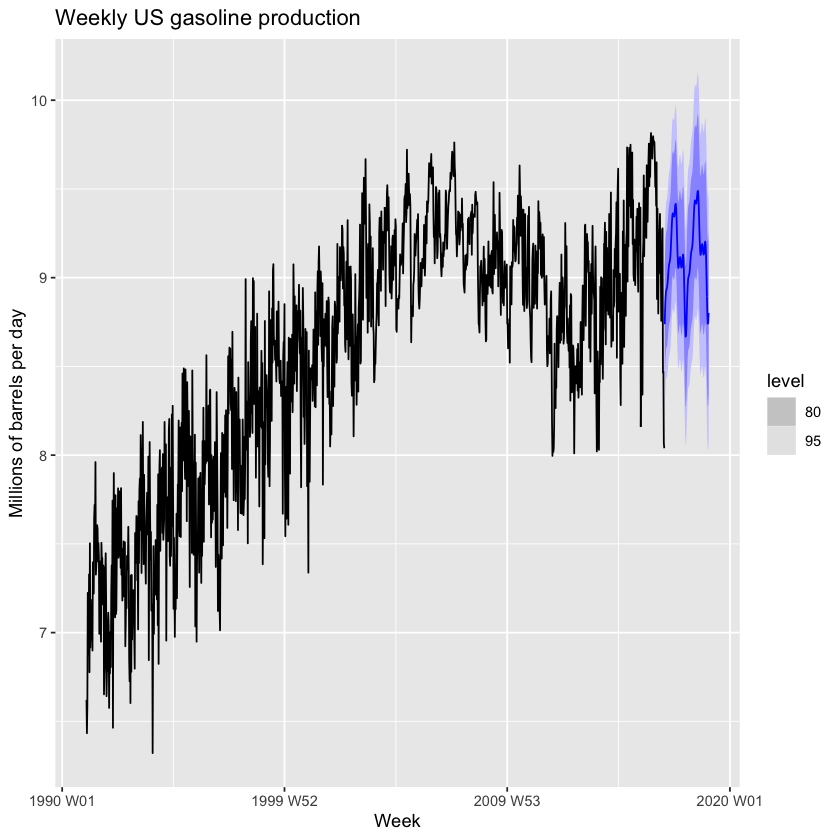

In [17]:
gas_dhr %>%
  forecast(h = "2 years") %>%
  autoplot(us_gasoline) +
  labs(y = "Millions of barrels per day",
       title = "Weekly US gasoline production")


- The STL approach is preferable when the seasonality changes over time. 

- The dynamic harmonic regression approach is preferable if there are covariates that are useful predictors as these can be added as additional regressors.

# Daily and sub-daily data


- Daily and sub-daily (such as hourly) data are challenging for a different reason — they often involve multiple seasonal patterns, and so we need to use a method that handles such complex seasonality.
- if the time series is relatively short so that only one type of seasonality is present, then it will be possible to use one of the single-seasonal methods we have discussed in previous chapters (e.g., ETS or a seasonal ARIMA model).
- But when the time series is long enough so that some of the longer seasonal periods become apparent, it will be necessary to use 
 - STL, 
 - dynamic harmonic regression or
 - Prophet, 
- However, these methods only allow for regular seasonality.

- Capturing seasonality associated with moving events such as Easter, Id, or the Chinese New Year is more difficult. Even with monthly data, this can be tricky as the festivals can fall in either March or April (for Easter), in January or February (for the Chinese New Year), or at any time of the year (for Id).

- The best way to deal with moving holiday effects is to include dummy variables in the model. 
- This can be done within 
 - the ARIMA() or 
 - prophet() functions, for example, 
- but not within ETS(). 

- In fact, prophet() has a holiday() special to easily incorporate holiday effects

#  13.2 Time series of counts


In [19]:
PBS

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.00
1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.00
1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.00
1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.00
1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.00
1991 Dec,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15028,54299.00
1992 Jan,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,11040,39753.00
1992 Feb,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15165,54405.00
1992 Mar,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,16898,61108.00


In [22]:
j06 <- PBS %>%
  filter(ATC2 == "J06") %>%
  summarise(Scripts = sum(Scripts))

j06

Month,Scripts
<mth>,<dbl>
1991 Jul,1
1991 Aug,1
1991 Sep,1
1991 Oct,0
1991 Nov,0
1991 Dec,1
1992 Jan,3
1992 Feb,1
1992 Mar,1


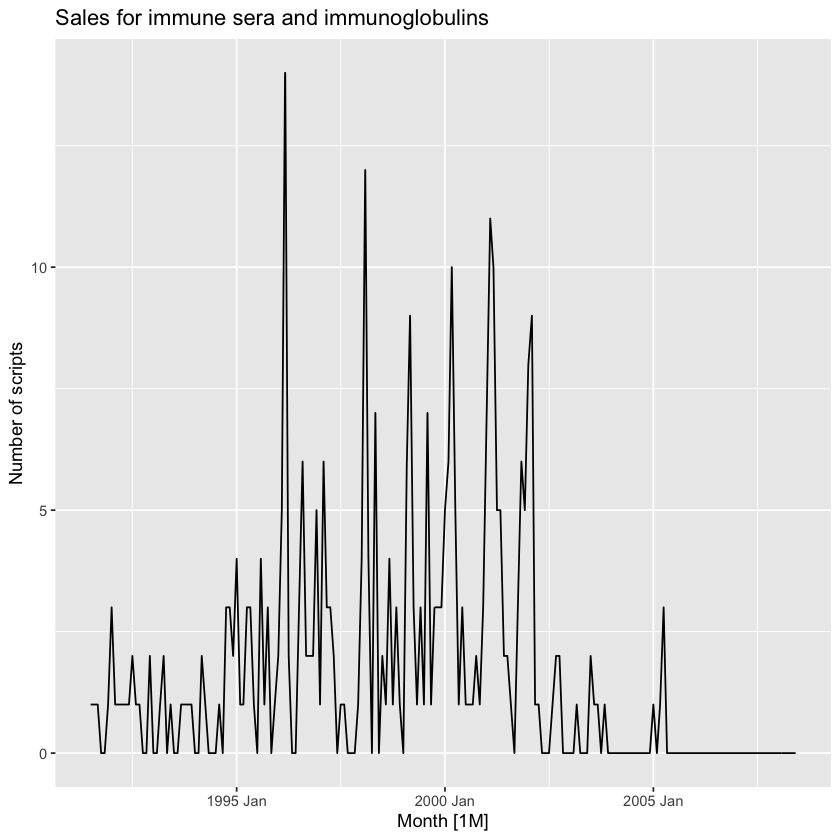

In [23]:
j06 %>% autoplot(Scripts) +
  labs(y="Number of scripts",
       title = "Sales for immune sera and immunoglobulins")


In [24]:
j06 %>%
  model(CROSTON(Scripts)) %>%
  forecast(h = 6)

.model,Month,Scripts,.mean
<chr>,<mth>,<dist>,<dbl>
CROSTON(Scripts),2008 Jul,0.9735062,0.9735062
CROSTON(Scripts),2008 Aug,0.9735062,0.9735062
CROSTON(Scripts),2008 Sep,0.9735062,0.9735062
CROSTON(Scripts),2008 Oct,0.9735062,0.9735062
CROSTON(Scripts),2008 Nov,0.9735062,0.9735062
CROSTON(Scripts),2008 Dec,0.9735062,0.9735062


# 13.3 Ensuring forecasts stay within limits

# Positive forecasts

In [32]:
prices

year,eggs,chicken,copper,nails,oil,wheat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1800,NA,NA,9.281972,168.89,NA,919.68
1801,NA,NA,8.999700,172.27,NA,897.71
1802,NA,NA,8.560122,218.71,NA,687.41
1803,NA,NA,8.599723,188.72,NA,645.95
1804,NA,NA,9.599666,188.36,NA,662.24
1805,NA,NA,10.099527,188.36,NA,822.04
1806,NA,NA,9.956961,163.17,NA,736.15
1807,NA,NA,10.390599,174.29,NA,693.71
1808,NA,NA,8.549561,159.77,NA,682.87


Plot variable not specified, automatically selected `.vars = eggs`

Warning message:
“Removed 104 row(s) containing missing values (geom_path).”


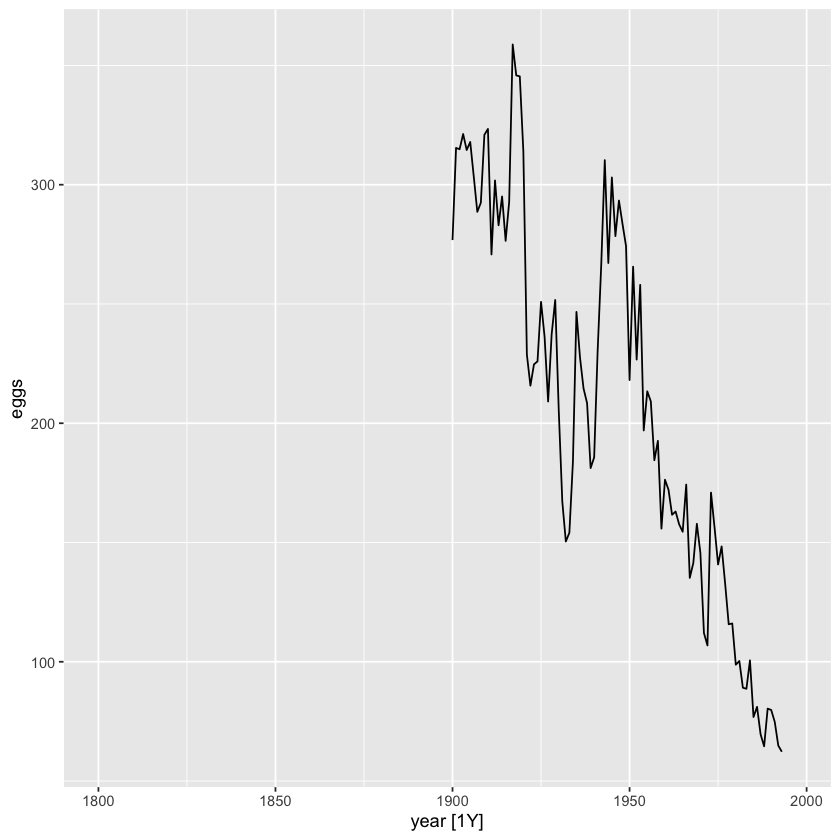

In [37]:
egg_1 <- prices %>% select(eggs)

autoplot(egg_1)

Plot variable not specified, automatically selected `.vars = eggs`



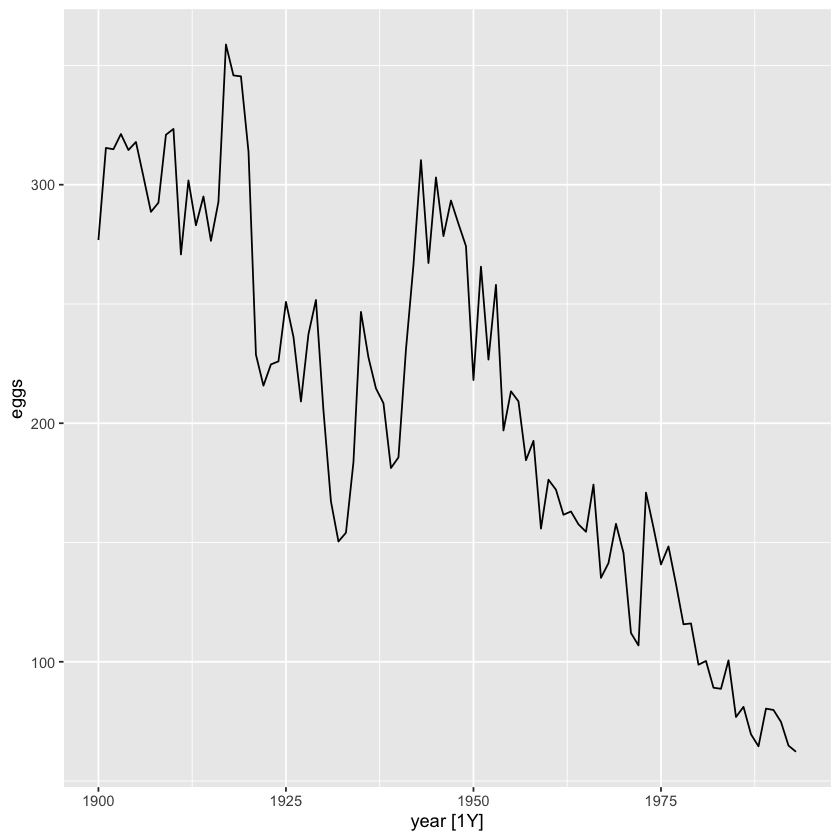

In [40]:
egg_2<- prices %>% select(eggs)%>%filter(!is.na(eggs)) 
autoplot(egg_2)

In [41]:
egg_prices<- prices %>% filter(!is.na(eggs))


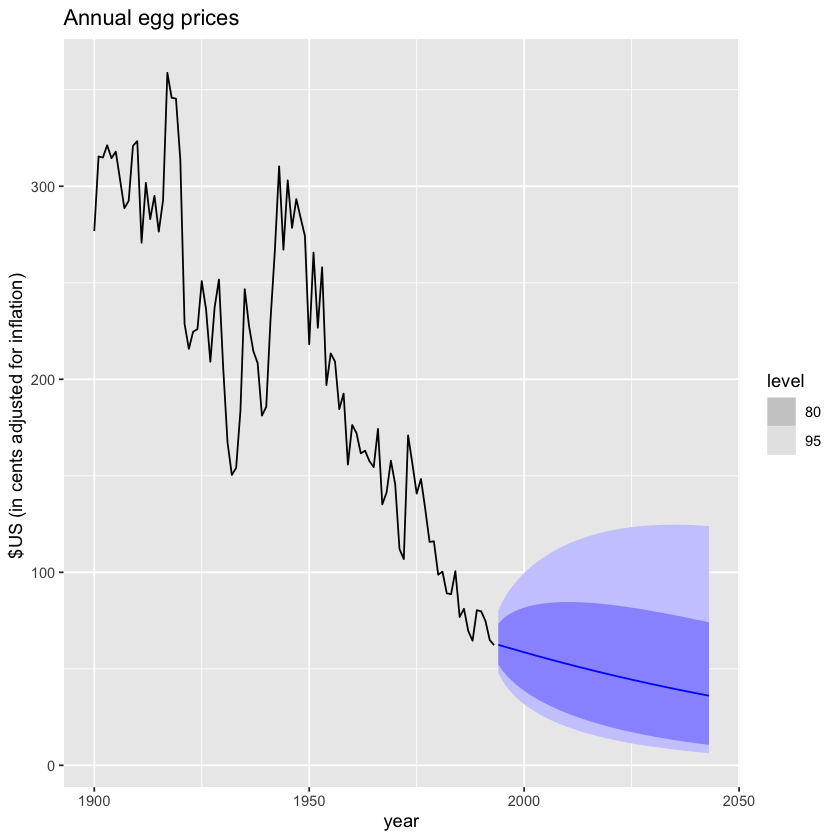

In [44]:
egg_prices %>%
 model(
    ETS(log(eggs)~ trend("A")) 
      ) %>%
forecast(h=50)%>%
autoplot(egg_prices)+
labs(title = "Annual egg prices",
       y = "$US (in cents adjusted for inflation) ")


# Forecasts constrained to an interval


In [45]:
scaled_logit <- function(x, lower = 0, upper = 1) {
  log((x - lower) / (upper - x))
}


In [46]:
inv_scaled_logit <- function(x, lower = 0, upper = 1) {
  (upper - lower) * exp(x) / (1 + exp(x)) + lower
}

In [47]:
my_scaled_logit <- new_transformation(
                    scaled_logit, inv_scaled_logit)

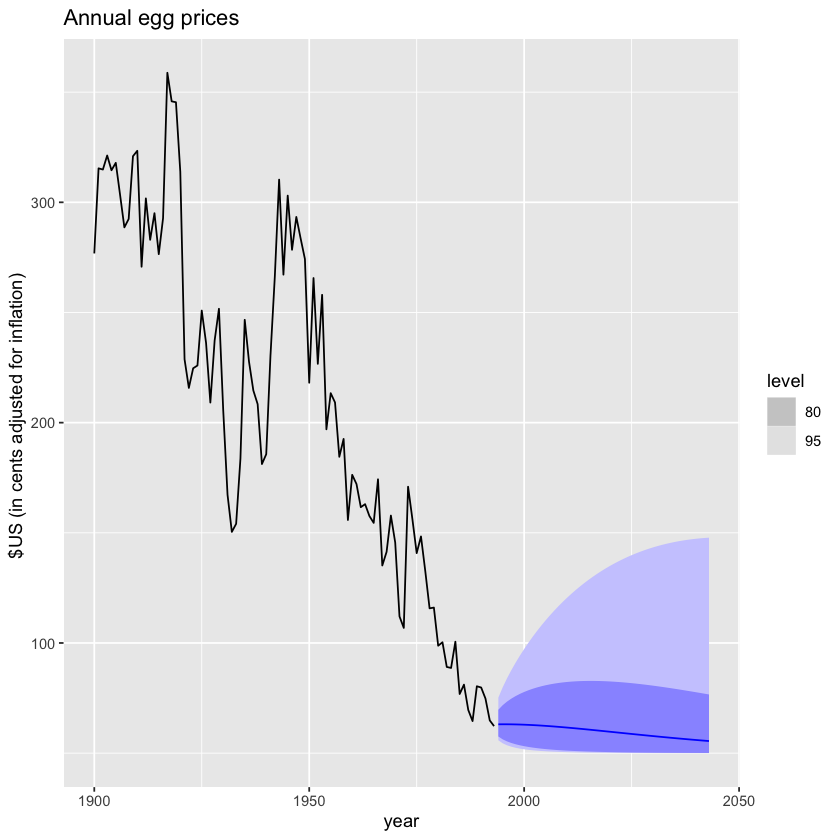

In [48]:
egg_prices %>%
  model(
    ETS(my_scaled_logit(eggs, lower = 50, upper = 400)
          ~ trend("A"))
  ) %>%
  forecast(h = 50) %>%
  autoplot(egg_prices) +
  labs(title = "Annual egg prices",
       y = "$US (in cents adjusted for inflation) ")

# 13.4 Forecast combinations

- An easy way to improve forecast accuracy is to use several different methods on the same time series, and to average the resulting forecasts. 

- combining forecasts often leads to better forecast accuracy.
### The results have been virtually unanimous: combining multiple forecasts leads to increased forecast accuracy. In many cases one can make dramatic performance improvements by simply averaging the forecasts.


- Data: monthly revenue from take-away food in Australia, from April 1982 to December 2018. 
- We use forecasts from the following models: ETS, STL-ETS, and ARIMA; and 
- we compare the results using the last 5 years (60 months) of observations

In [50]:
auscafe <- aus_retail %>%
  filter(stringr::str_detect(Industry, "Takeaway")) %>%
  summarise(Turnover = sum(Turnover))

auscafe

Month,Turnover
<mth>,<dbl>
1982 Apr,193.7
1982 May,193.9
1982 Jun,186.3
1982 Jul,189.5
1982 Aug,190.5
1982 Sep,195.3
1982 Oct,209.0
1982 Nov,212.5
1982 Dec,238.2


Plot variable not specified, automatically selected `.vars = Turnover`



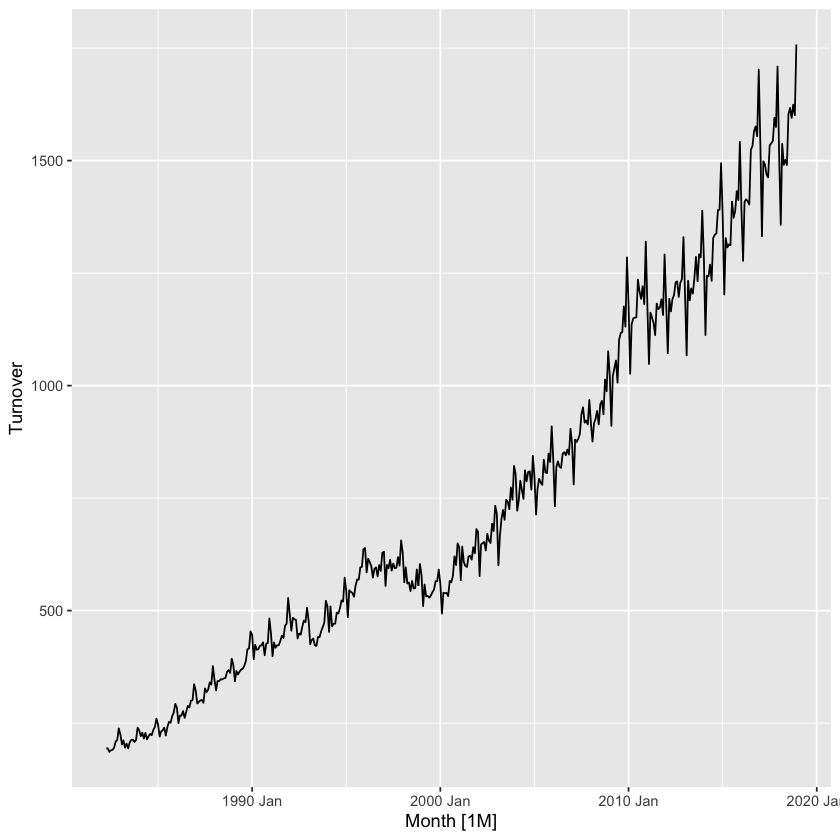

In [51]:
autoplot(auscafe)

In [52]:
train<-auscafe %>%
 filter(year(Month)<=2013)


In [54]:
STLF <- decomposition_model(
  STL(log(Turnover) ~ season(window = Inf)),
  ETS(season_adjust ~ season("N"))
)

STLF

<dcmp_mdl model definition>

In [59]:


cafe_models <- train %>%
 model(
  ets =ETS(Turnover),
  stlf= STLF,
arima=ARIMA(log(Turnover))
      )%>%
mutate(combination= (ets+stlf+arima)/3)

In [60]:
cafe_fc<-cafe_models %>%
 forecast(h="5 years")

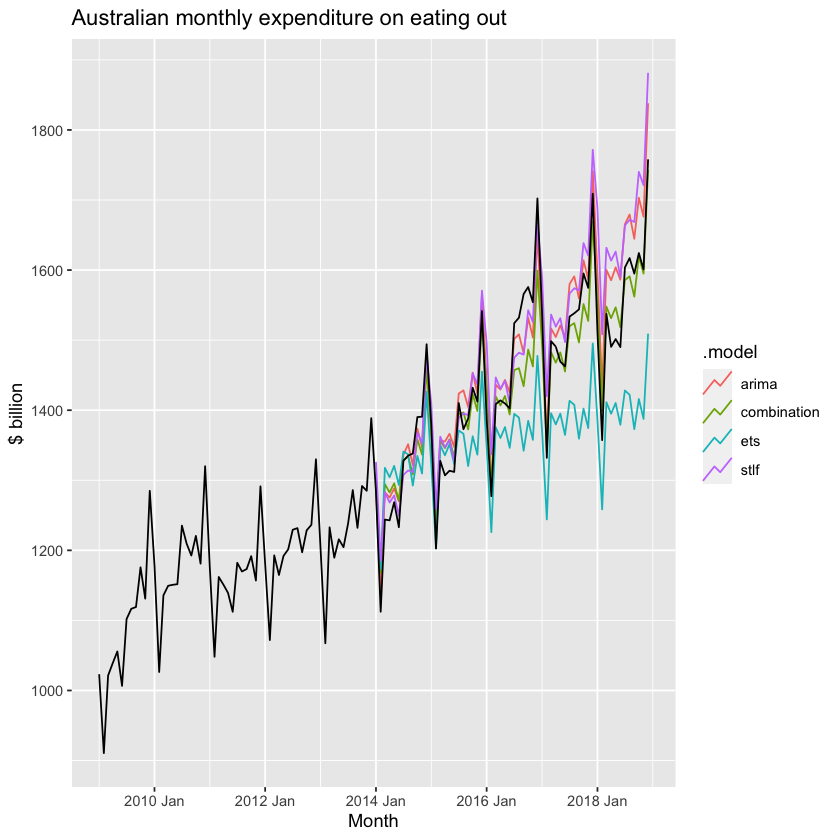

In [65]:
cafe_fc %>%
  autoplot(auscafe %>% filter(year(Month) > 2008),
           level = NULL) +
  labs(y = "$ billion",
       title = "Australian monthly expenditure on eating out")

In [63]:
cafe_fc %>%
 accuracy(auscafe) %>%
 arrange(RMSE)

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
combination,Test,8.09122,41.02523,31.84305,0.400690,2.189961,0.7764750,0.7899334,0.7468775
arima,Test,-25.38084,46.24182,38.92123,-1.766443,2.654537,0.9490726,0.8903780,0.7860494
stlf,Test,-36.88789,64.08230,51.74028,-2.545729,3.541498,1.2616577,1.2338932,0.7751640
ets,Test,86.54239,122.05610,100.83909,5.514242,6.664271,2.4589048,2.3501684,0.8795092


-ARIMA does particularly well with this series, while the combination approach does even better (based on most measures including RMSE and MAE). For other data, ARIMA may be quite poor, while the combination approach is usually not far off, or better than, the best component method.

# Forecast combination distributions
- The cafe_fc object contains forecast distributions, from which any prediction interval can usually be computed. Let’s look at the intervals for the first period.

In [67]:
cafe_fc %>% filter(Month==min(Month))

.model,Month,Turnover,.mean
<chr>,<mth>,<dist>,<dbl>
ets,2014 Jan,"N(1289, 1118)",1289.058
stlf,2014 Jan,"t(N(7.2, 0.00063))",1326.188
arima,2014 Jan,"t(N(7.2, 0.00061))",1282.894
combination,2014 Jan,1299.38,1299.380


- The first three are a mixture of normal and transformed normal distributions. The package does not yet combine such diverse distributions, so the combination output is simply the mean instead.

-However, if we work with simulated sample paths, it is possible to create forecast distributions for the combination forecast as well.

In [72]:
cafe_futures <- cafe_models %>%
 # Generate 1000 future samples paths
generate(h="5 years", times =1000)%>%
# Compute forecast distribution from future sample paths
as_tibble()%>%
group_by(Month, .model)%>%
summarise(
 dist=distributional::dist_sample(list(.sim))   
         ) %>%
ungroup() %>%
# crate fable object
as_fable(index=Month, key=.model, distribution=dist, response="Turnover")

`summarise()` has grouped output by 'Month'. You can override using the `.groups` argument.

Warning message:
“The dimnames of the fable's distribution are missing and have been set to match the response variables.”


In [73]:
# Forecast distributions for h=1
cafe_futures %>% filter(Month == min(Month))

Month,.model,dist
<mth>,<chr>,<dist>
2014 Jan,arima,sample[1000]
2014 Jan,combination,sample[1000]
2014 Jan,ets,sample[1000]
2014 Jan,stlf,sample[1000]


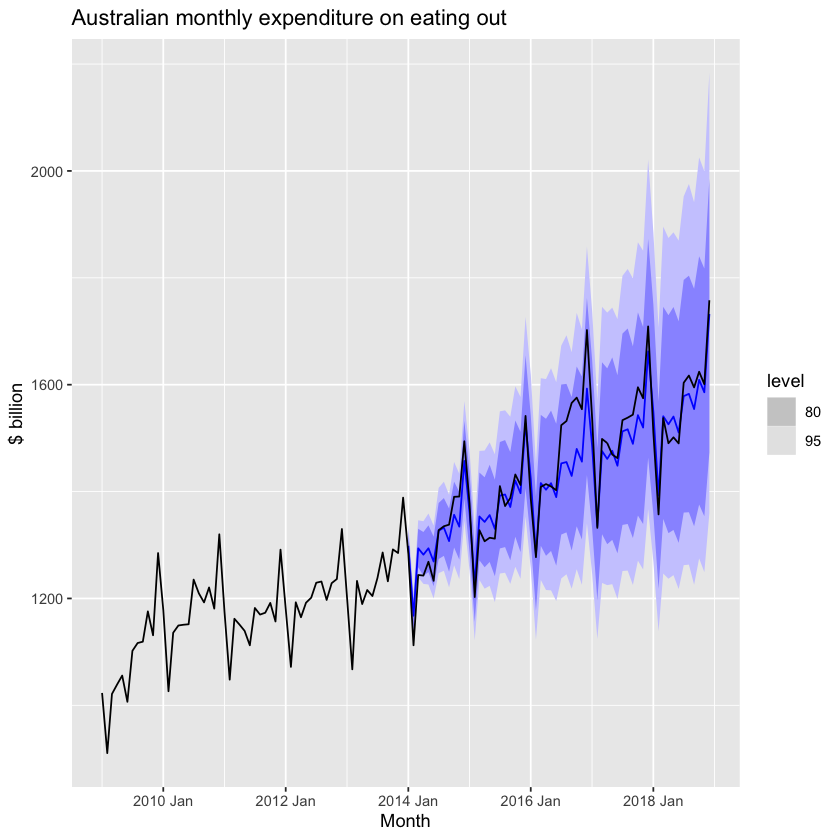

In [76]:
cafe_futures %>%
 filter(.model=="combination") %>%
 autoplot(auscafe %>% filter(year(Month)>2008))+

  labs(y = "$ billion",
       title = "Australian monthly expenditure on eating out")

To check the accuracy of the 95% prediction intervals, we can use a Winkler score

In [78]:
cafe_futures %>%
  accuracy(auscafe, measures = interval_accuracy_measures,
    level = 95)

.model,.type,winkler
<chr>,<chr>,<dbl>
arima,Test,806.5137
combination,Test,426.3624
ets,Test,750.6555
stlf,Test,579.8776


In [80]:
 cafe_futures %>%
  accuracy(auscafe, measures = interval_accuracy_measures,
    level = 95)%>%
  arrange(winkler)

.model,.type,winkler
<chr>,<chr>,<dbl>
combination,Test,426.3624
stlf,Test,579.8776
ets,Test,750.6555
arima,Test,806.5137


Lower is better, so the combination forecast is again better than any of the component models.

# 13.5 Prediction intervals for aggregates

- A common problem is to forecast the aggregate of several time periods of data, using a model fitted to the disaggregated data.
- For example, we may have monthly data but wish to forecast the total for the next year. 
- Or we may have weekly data, and want to forecast the total for the next four weeks.

- If the point forecasts are means, then adding them up will give a good estimate of the total. 
- But prediction intervals are more tricky due to the correlations between forecast errors.

A general solution is to use simulations. Here is an example using ETS models applied to Australian take-away food sales, assuming we wish to forecast the aggregate revenue in the next 12 months.

In [96]:
fit <- auscafe %>%
 model(
     ETS(Turnover)
      )

In [97]:
futures <- fit %>%
# simulate 10000 future sample paths, each lenght 12
 generate(times=10000, h=12) %>%
# sum the results for each sample path
as_tibble() %>%
group_by(.rep) %>%
summarise(.sim=sum(.sim)) %>%
# store as a distribution
summarise(total=distributional::dist_sample(list(.sim)))



We can compute the mean of the simulations, along with prediction intervals:

In [98]:
futures %>%
mutate(
   mean=mean(total),
    pi80=hilo(total,80),
    pi95=hilo(total,95)
      )

total,mean,pi80,pi95
<dist>,<dbl>,<hilo>,<hilo>
sample[10000],19215.5,"[18319.04, 20104.24]80","[17882.04, 20618.13]95"


As expected, the mean of the simulated data is close to the sum of the individual forecasts.

In [99]:
forecast(fit,h=12)%>%
 as_tibble()%>%
summarise(total=sum(.mean))

total
<dbl>
19212.37


# 13.6 Backcasting

- Sometimes it is useful to “backcast” a time series — that is, forecast in reverse time. Although there are no in-built R functions to do this, it is easy to implement by creating a new time index.

- Suppose we want to extend our Australian takeaway to the start of 1981 (the actual data starts in April 1982).


In [100]:
auscafe

Month,Turnover
<mth>,<dbl>
1982 Apr,193.7
1982 May,193.9
1982 Jun,186.3
1982 Jul,189.5
1982 Aug,190.5
1982 Sep,195.3
1982 Oct,209.0
1982 Nov,212.5
1982 Dec,238.2


In [101]:
backcasts <- auscafe %>%
  mutate(reverse_time = rev(row_number()))

In [102]:
backcasts

Month,Turnover,reverse_time
<mth>,<dbl>,<int>
1982 Apr,193.7,441
1982 May,193.9,440
1982 Jun,186.3,439
1982 Jul,189.5,438
1982 Aug,190.5,437
1982 Sep,195.3,436
1982 Oct,209.0,435
1982 Nov,212.5,434
1982 Dec,238.2,433


In [103]:
backcasts <- auscafe %>%
  mutate(reverse_time = rev(row_number())) %>%
  update_tsibble(index = reverse_time)

In [104]:
backcasts

Month,Turnover,reverse_time
<mth>,<dbl>,<int>
2018 Dec,1758.0,1
2018 Nov,1601.0,2
2018 Oct,1624.3,3
2018 Sep,1594.9,4
2018 Aug,1617.1,5
2018 Jul,1603.6,6
2018 Jun,1490.1,7
2018 May,1501.5,8
2018 Apr,1490.4,9


In [105]:
backcasts <- auscafe %>%
  mutate(reverse_time = rev(row_number())) %>%
  update_tsibble(index = reverse_time) %>%
  model(ets = ETS(Turnover ~ season(period = 12))) %>%
  forecast(h = 15)

In [106]:
backcasts

.model,reverse_time,Turnover,.mean
<chr>,<dbl>,<dist>,<dbl>
ets,442,"N(199, 26)",199.3367
ets,443,"N(188, 34)",188.2161
ets,444,"N(205, 54)",205.3396
ets,445,"N(213, 74)",212.7528
ets,446,"N(190, 72)",190.0904
ets,447,"N(186, 82)",186.0464
ets,448,"N(178, 88)",178.3789
ets,449,"N(177, 100)",176.6980
ets,450,"N(173, 110)",173.3713


In [107]:
backcasts <- auscafe %>%
  mutate(reverse_time = rev(row_number())) %>%
  update_tsibble(index = reverse_time) %>%
  model(ets = ETS(Turnover ~ season(period = 12))) %>%
  forecast(h = 15) %>%
  mutate(Month = auscafe$Month[1] - (1:15)) 


In [108]:
backcasts

.model,reverse_time,Turnover,.mean,Month
<chr>,<dbl>,<dist>,<dbl>,<mth>
ets,442,"N(199, 26)",199.3367,1982 Mar
ets,443,"N(188, 34)",188.2161,1982 Feb
ets,444,"N(205, 54)",205.3396,1982 Jan
ets,445,"N(213, 74)",212.7528,1981 Dec
ets,446,"N(190, 72)",190.0904,1981 Nov
ets,447,"N(186, 82)",186.0464,1981 Oct
ets,448,"N(178, 88)",178.3789,1981 Sep
ets,449,"N(177, 100)",176.6980,1981 Aug
ets,450,"N(173, 110)",173.3713,1981 Jul


In [109]:
backcasts <- auscafe %>%
  mutate(reverse_time = rev(row_number())) %>%
  update_tsibble(index = reverse_time) %>%
  model(ets = ETS(Turnover ~ season(period = 12))) %>%
  forecast(h = 15) %>%
  mutate(Month = auscafe$Month[1] - (1:15)) %>%
  as_fable(index = Month, response = "Turnover",
    distribution = "Turnover")

In [110]:
backcasts

.model,reverse_time,Turnover,.mean,Month
<chr>,<dbl>,<dist>,<dbl>,<mth>
ets,456,"N(180, 233)",180.2816,1981 Jan
ets,455,"N(165, 180)",165.4794,1981 Feb
ets,454,"N(175, 184)",175.4970,1981 Mar
ets,453,"N(170, 149)",170.1820,1981 Apr
ets,452,"N(175, 141)",174.6324,1981 May
ets,451,"N(167, 114)",166.6218,1981 Jun
ets,450,"N(173, 110)",173.3713,1981 Jul
ets,449,"N(177, 100)",176.6980,1981 Aug
ets,448,"N(178, 88)",178.3789,1981 Sep


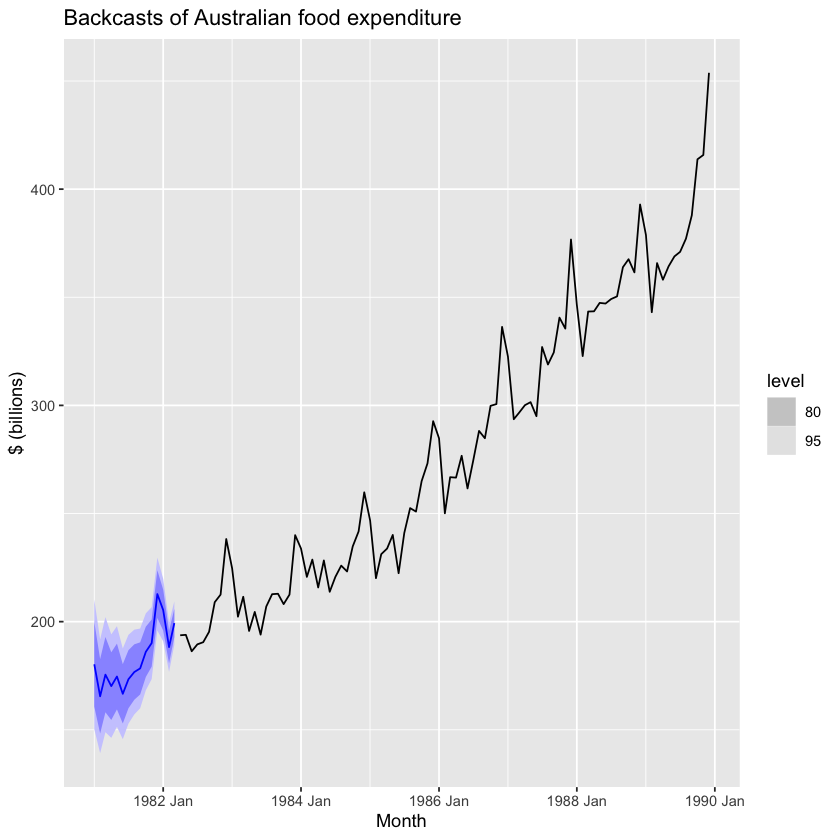

In [111]:
backcasts %>%
  autoplot(auscafe %>% filter(year(Month) < 1990)) +
  labs(title = "Backcasts of Australian food expenditure",
       y = "$ (billions)")

- Most of the work here is in re-indexing the tsibble object and then re-indexing the fable object.

# 13.7 Very long and very short time series

### Forecasting very short time series

- We often get asked how few data points can be used to fit a time series model. 
- As with almost all sample size questions, there is no easy answer. It depends on the number of model parameters to be estimated and the amount of randomness in the data.
- The sample size required increases with the number of parameters to be estimated, and the amount of noise in the data.

In [112]:
m3totsibble <- function(z) {
  bind_rows(
    as_tsibble(z$x) %>% mutate(Type = "Training"),
    as_tsibble(z$xx) %>% mutate(Type = "Test")
  ) %>%
    mutate(
      st = z$st,
      type = z$type,
      period = z$period,
      description = z$description,
      sn = z$sn,
    ) %>%
    as_tibble()
}

In [113]:
m3totsibble

function(z) {
  bind_rows(
    as_tsibble(z$x) %>% mutate(Type = "Training"),
    as_tsibble(z$xx) %>% mutate(Type = "Test")
  ) %>%
    mutate(
      st = z$st,
      type = z$type,
      period = z$period,
      description = z$description,
      sn = z$sn,
    ) %>%
    as_tibble()
}

In [118]:
install.packages('Mcomp')
#library(Mcomp)

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘RcppArmadillo’, ‘forecast’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [120]:
short <- Mcomp::M3

In [121]:
short

M-Competition data: 3003 time series 

           Type of data
Period      DEMOGRAPHIC FINANCE INDUSTRY MACRO MICRO OTHER Total
  MONTHLY           111     145      334   312   474    52  1428
  OTHER               0      29        0     0     4   141   174
  QUARTERLY          57      76       83   336   204     0   756
  YEARLY            245      58      102    83   146    11   645
  Total             413     308      519   731   828   204  3003

In [124]:
short <- Mcomp::M3 %>%
  subset("yearly")

short

M-Competition data: 645 YEARLY time series

        Type of data
Period   DEMOGRAPHIC FINANCE INDUSTRY MACRO MICRO OTHER
  YEARLY         245      58      102    83   146    11

In [125]:
short <- Mcomp::M3 %>%
  subset("yearly") %>%
  purrr::map_dfr(m3totsibble) 

short

index,value,Type,st,type,period,description,sn
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1975,940.66,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1976,1084.86,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1977,1244.98,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1978,1445.02,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1979,1683.17,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1980,2038.15,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1981,2342.52,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1982,2602.45,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1983,2927.87,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001


In [126]:
short <- Mcomp::M3 %>%
  subset("yearly") %>%
  purrr::map_dfr(m3totsibble) %>%
  group_by(sn)

short

index,value,Type,st,type,period,description,sn
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1975,940.66,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1976,1084.86,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1977,1244.98,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1978,1445.02,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1979,1683.17,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1980,2038.15,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1981,2342.52,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1982,2602.45,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001
1983,2927.87,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001


In [127]:
short <- Mcomp::M3 %>%
  subset("yearly") %>%
  purrr::map_dfr(m3totsibble) %>%
  group_by(sn) %>%
  mutate(n = max(row_number()))

short

index,value,Type,st,type,period,description,sn,n
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1975,940.66,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1976,1084.86,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1977,1244.98,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1978,1445.02,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1979,1683.17,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1980,2038.15,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1981,2342.52,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1982,2602.45,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1983,2927.87,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20


In [129]:
short <- Mcomp::M3 %>%
  subset("yearly") %>%
  purrr::map_dfr(m3totsibble) %>%
  group_by(sn) %>%
  mutate(n = max(row_number())) %>%
  filter(n <= 20) %>%
  ungroup()

short

index,value,Type,st,type,period,description,sn,n
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1975,940.66,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1976,1084.86,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1977,1244.98,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1978,1445.02,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1979,1683.17,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1980,2038.15,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1981,2342.52,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1982,2602.45,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1983,2927.87,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20


In [130]:
short <- Mcomp::M3 %>%
  subset("yearly") %>%
  purrr::map_dfr(m3totsibble) %>%
  group_by(sn) %>%
  mutate(n = max(row_number())) %>%
  filter(n <= 20) %>%
  ungroup() %>%
  as_tsibble(index = index, key = c(sn, period, st))

In [131]:
short

index,value,Type,st,type,period,description,sn,n
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1975,940.66,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1976,1084.86,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1977,1244.98,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1978,1445.02,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1979,1683.17,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1980,2038.15,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1981,2342.52,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1982,2602.45,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20
1983,2927.87,Training,Y1,MICRO,YEARLY,SALES ( CODE= ABT),N0001,20


In [133]:
short_fit <- short %>%
  model(arima = ARIMA(value))

short_fit

sn,period,st,arima
<chr>,<chr>,<chr>,<model>
N0001,YEARLY,Y1,"<ARIMA(1,2,0)>"
N0002,YEARLY,Y2,"<ARIMA(1,0,0) w/ mean>"
N0003,YEARLY,Y3,"<ARIMA(2,0,0) w/ mean>"
N0004,YEARLY,Y4,"<ARIMA(0,1,0)>"
N0005,YEARLY,Y5,"<ARIMA(1,0,0) w/ mean>"
N0006,YEARLY,Y6,"<ARIMA(0,1,0) w/ drift>"
N0007,YEARLY,Y7,"<ARIMA(0,1,0)>"
N0008,YEARLY,Y8,"<ARIMA(0,1,1)>"
N0009,YEARLY,Y9,"<ARIMA(0,1,0) w/ drift>"


# Forecasting very long time series


# 13.8 Forecasting on training and test sets

- Typically, we compute one-step forecasts on the training data (the “fitted values”) and multi-step forecasts on the test data.
- However, occasionally we may wish to compute multi-step forecasts on the training data, or one-step forecasts on the test data.

We will illustrate the method using an ARIMA model for the Australian take-away food expenditure. The last five years are used for a test set, and the forecasts are plotted

In [138]:
training <- auscafe %>% filter(year(Month) <= 2013)
test <- auscafe %>% filter(year(Month) > 2013)




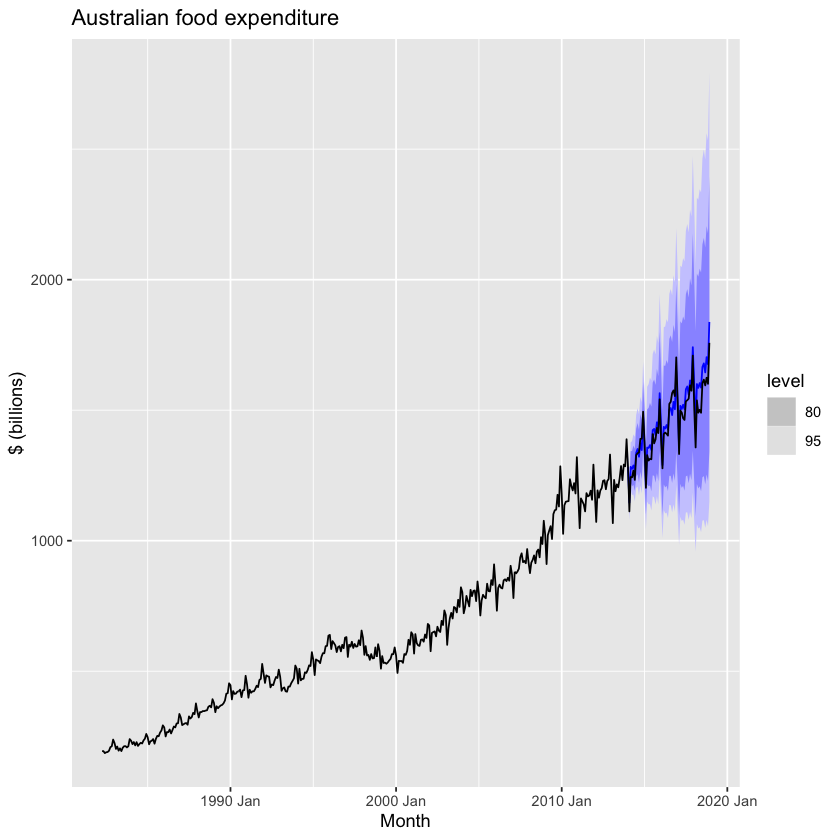

In [140]:
cafe_fit <- training %>%
  model(ARIMA(log(Turnover)))
cafe_fit %>%
  forecast(h = 60) %>%
  autoplot(auscafe) +
  labs(title = "Australian food expenditure",
       y = "$ (billions)")

- The fitted() function has an h argument to allow for  
h-step “fitted values” on the training set

Warning message:
“Removed 25 row(s) containing missing values (geom_path).”


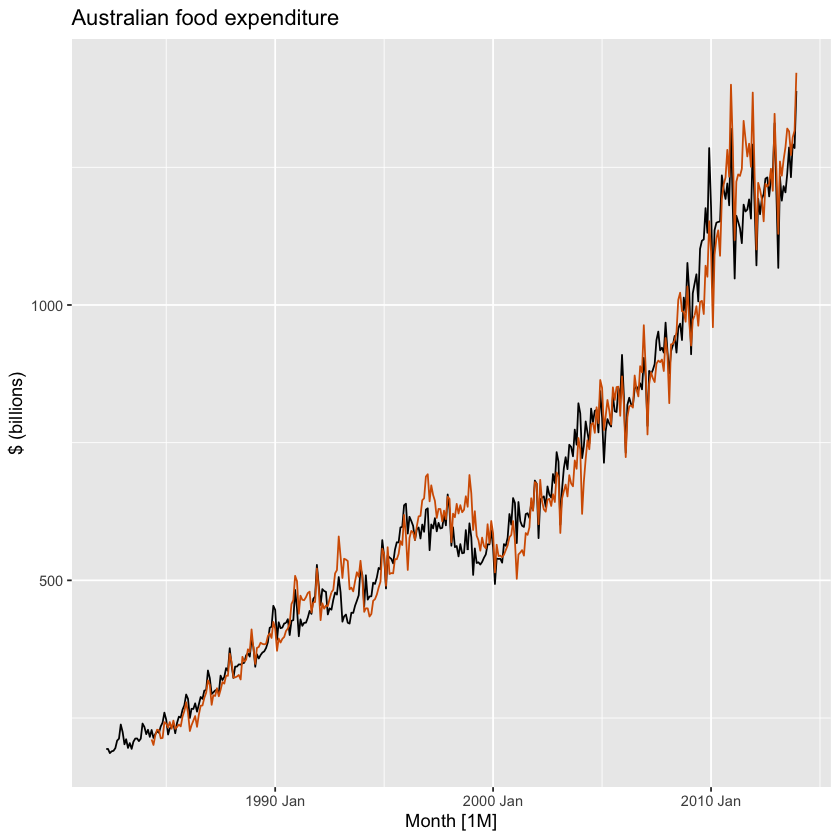

In [141]:
fits12 <- fitted(cafe_fit, h = 12)
training %>%
  autoplot(Turnover) +
  autolayer(fits12, .fitted, col = "#D55E00") +
  labs(title = "Australian food expenditure",
       y = "$ (billions)")

# One-step forecasts on test data


In [137]:
cafe_fit %>%
  refit(test) %>%
  accuracy()

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA(log(Turnover)),Training,-2.488671,20.46382,15.3815,-0.1694706,1.055543,0.2363658,0.2590245,-0.05024408


# 13.9 Dealing with outliers and missing values
##  Outliers

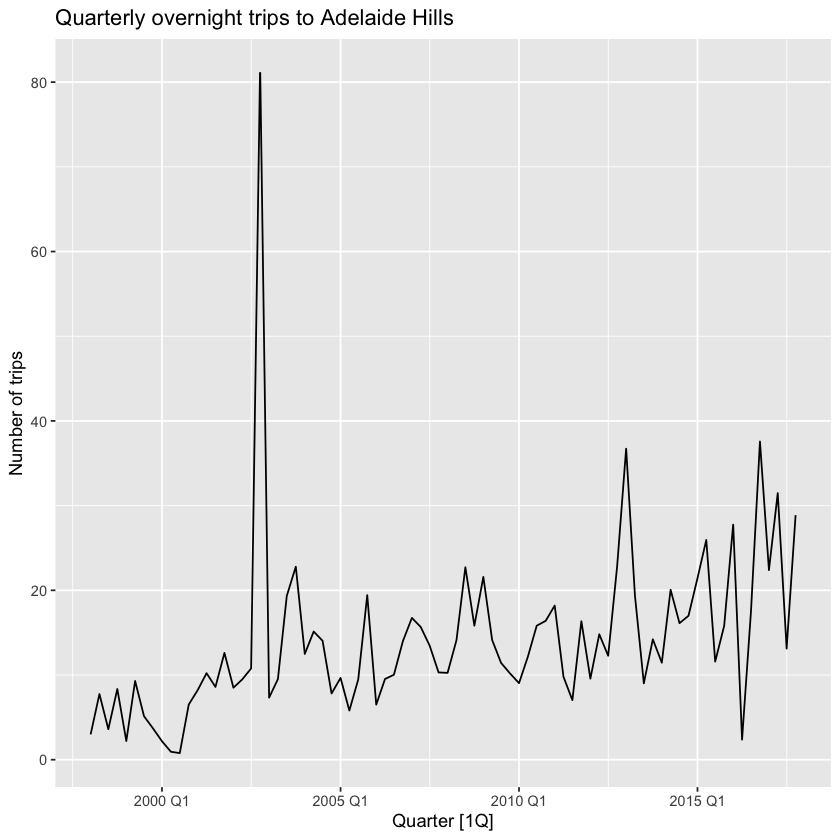

In [142]:
tourism %>%
  filter(
    Region == "Adelaide Hills", Purpose == "Visiting"
  ) %>%
  autoplot(Trips) +
  labs(title = "Quarterly overnight trips to Adelaide Hills",
       y = "Number of trips")

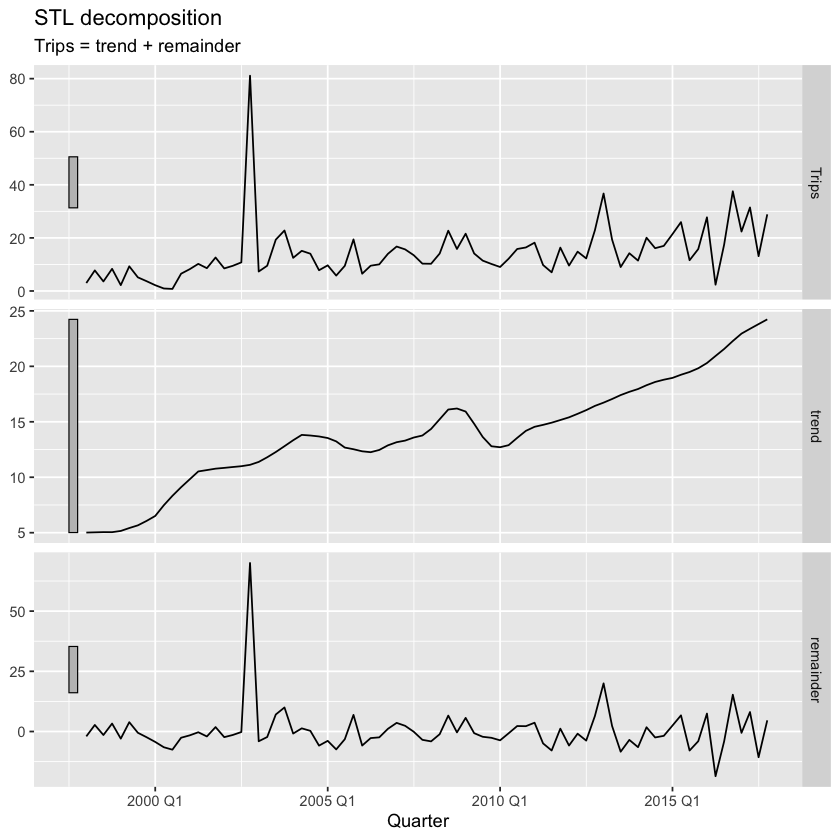

In [143]:
ah_decomp <- tourism %>%
  filter(
    Region == "Adelaide Hills", Purpose == "Visiting"
  ) %>%
  # Fit a non-seasonal STL decomposition
  model(
    stl = STL(Trips ~ season(period = 1), robust = TRUE)
  ) %>%
  components()
ah_decomp %>% autoplot()

In [144]:
outliers <- ah_decomp %>%
  filter(
    remainder < quantile(remainder, 0.25) - 3*IQR(remainder) |
    remainder > quantile(remainder, 0.75) + 3*IQR(remainder)
  )
outliers

Region,State,Purpose,.model,Quarter,Trips,trend,remainder,season_adjust
<chr>,<chr>,<chr>,<chr>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>
Adelaide Hills,South Australia,Visiting,stl,2002 Q4,81.10211,11.11922,69.98289,81.10211


In [145]:
ah_miss <- tourism %>%
  filter(
    Region == "Adelaide Hills",
    Purpose == "Visiting"
  ) %>%
  # Remove outlying observations
  anti_join(outliers) %>%
  # Replace with missing values
  fill_gaps()

Joining, by = c("Quarter", "Region", "State", "Purpose", "Trips")



Plot variable not specified, automatically selected `.vars = Trips`



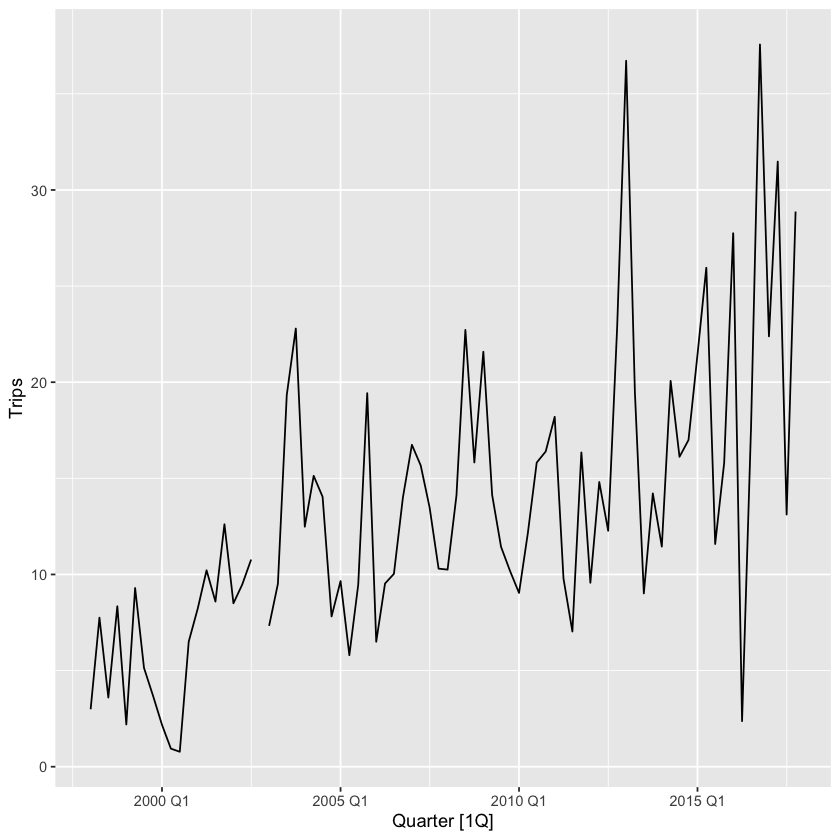

In [147]:
autoplot(ah_miss)

Plot variable not specified, automatically selected `.vars = Trips`



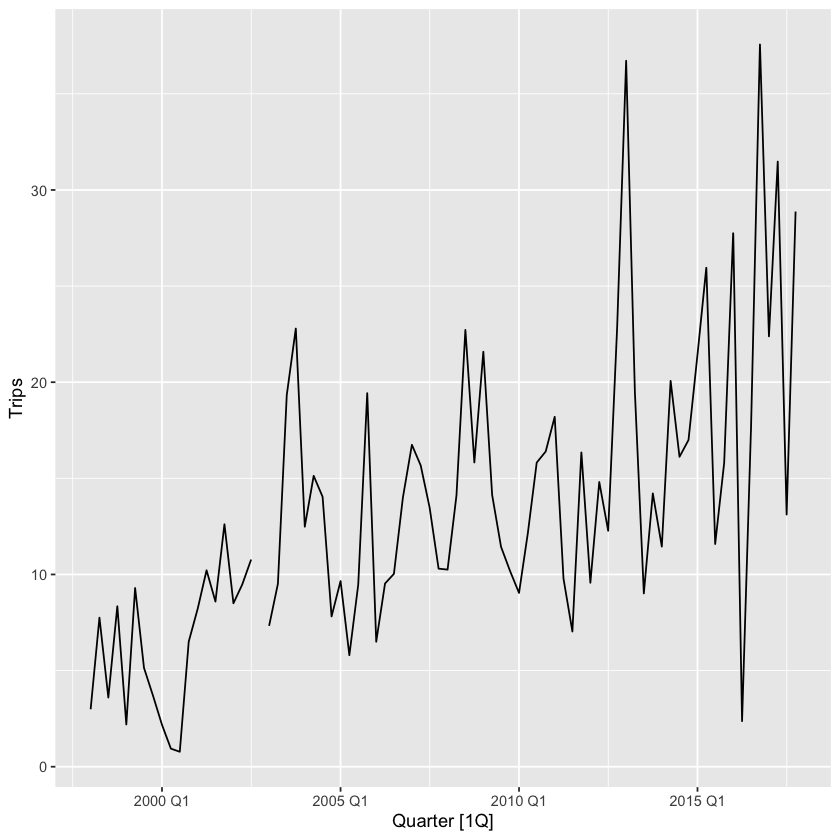

In [149]:
ah_fill <- ah_miss

autoplot(ah_fill)

In [150]:
ah_fill <- ah_miss %>%
  # Fit ARIMA model to the data containing missing values
  model(ARIMA(Trips)) %>%
  # Estimate Trips for all periods
  interpolate(ah_miss)

Plot variable not specified, automatically selected `.vars = Trips`



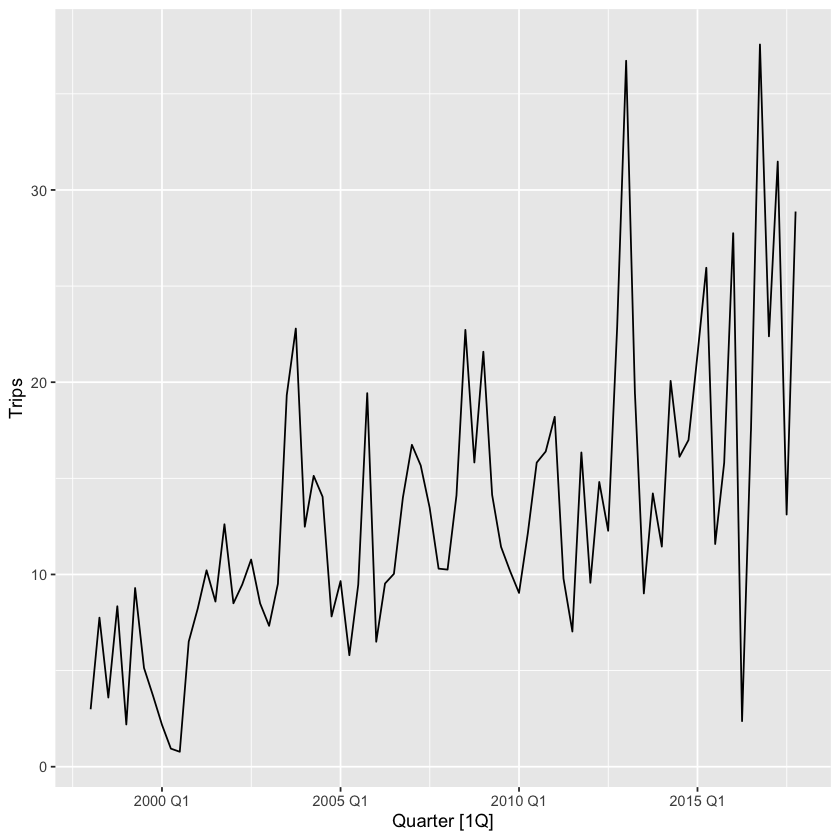

In [151]:
autoplot(ah_fill)

In [152]:
ah_fill <- ah_miss %>%
  # Fit ARIMA model to the data containing missing values
  model(ARIMA(Trips)) %>%
  # Estimate Trips for all periods
  interpolate(ah_miss)
ah_fill %>%
  # Only show outlying periods
  right_join(outliers %>% select(-Trips))

Joining, by = c("Region", "State", "Purpose", "Quarter")



Region,State,Purpose,Quarter,Trips,.model,trend,remainder,season_adjust
<chr>,<chr>,<chr>,<qtr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Adelaide Hills,South Australia,Visiting,2002 Q4,8.495345,stl,11.11922,69.98289,81.10211


Plot variable not specified, automatically selected `.vars = Trips`



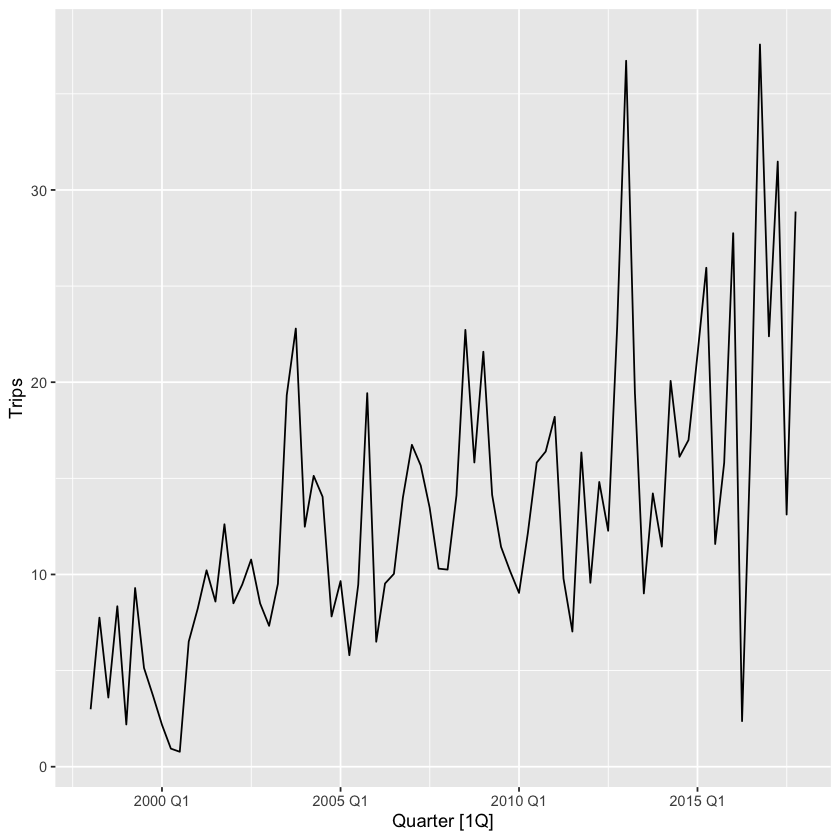

In [153]:
autoplot(ah_fill)

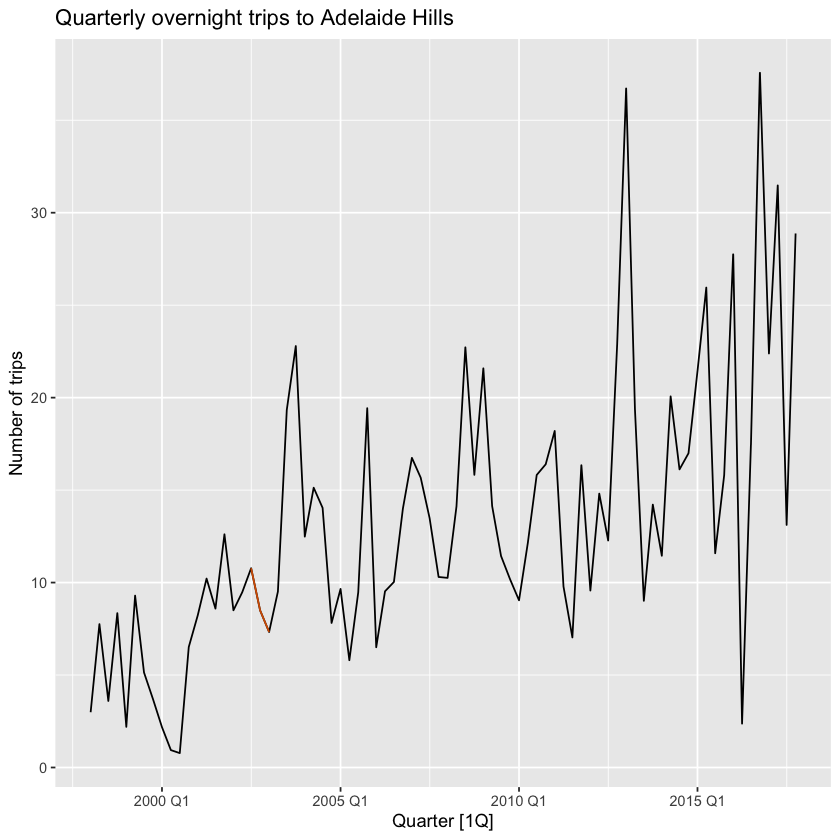

In [154]:
ah_fill %>%
  autoplot(Trips) +
  autolayer(ah_fill %>% filter_index("2002 Q3"~"2003 Q1"),
    Trips, colour="#D55E00") +
  labs(title = "Quarterly overnight trips to Adelaide Hills",
       y = "Number of trips")